In [22]:
import pandas as pd

# Load the dataset
url = "./dataset/page-blocks.data.csv"
columns = ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']
data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(data.head())

   height  length   area  eccen  p_black  p_and  mean_tr  blackpix  blackand  \
5       7      35  1.400  0.400    0.657   2.33       14        23         6   
6       7      42  1.167  0.429    0.881   3.60       18        37         5   
6      18     108  3.000  0.287    0.741   4.43       31        80         7   
5       7      35  1.400  0.371    0.743   4.33       13        26         3   
6       3      18  0.500  0.500    0.944   2.25        9        17         4   

   wb_trans  
5         1  
6         1  
6         1  
5         1  
6         1  


In [23]:
# Summary statistics
print(data.describe())

            height         length         area        eccen      p_black  \
count  5473.000000    5473.000000  5473.000000  5473.000000  5473.000000   
mean     89.568244    1198.405628    13.753977     0.368642     0.785053   
std     114.721758    4849.376950    30.703737     0.177757     0.170661   
min       1.000000       7.000000     0.007000     0.052000     0.062000   
25%      17.000000     114.000000     2.143000     0.261000     0.679000   
50%      41.000000     322.000000     5.167000     0.337000     0.803000   
75%     107.000000     980.000000    13.625000     0.426000     0.927000   
max     553.000000  143993.000000   537.000000     1.000000     1.000000   

             p_and       mean_tr      blackpix     blackand     wb_trans  
count  5473.000000   5473.000000   5473.000000  5473.000000  5473.000000  
mean      6.219278    365.930751    741.108167   106.662891     1.202631  
std      69.079021   1270.333082   1881.504302   167.308362     0.721470  
min       1.000

# Watermark Function

In [24]:
def add_watermark(ax, text):
    ax.text(0.5, 0.5, text, alpha=0.3, fontsize=50, color='gray',
            rotation=0, ha='center', va='center', transform=ax.transAxes)

# Bivariate EDA

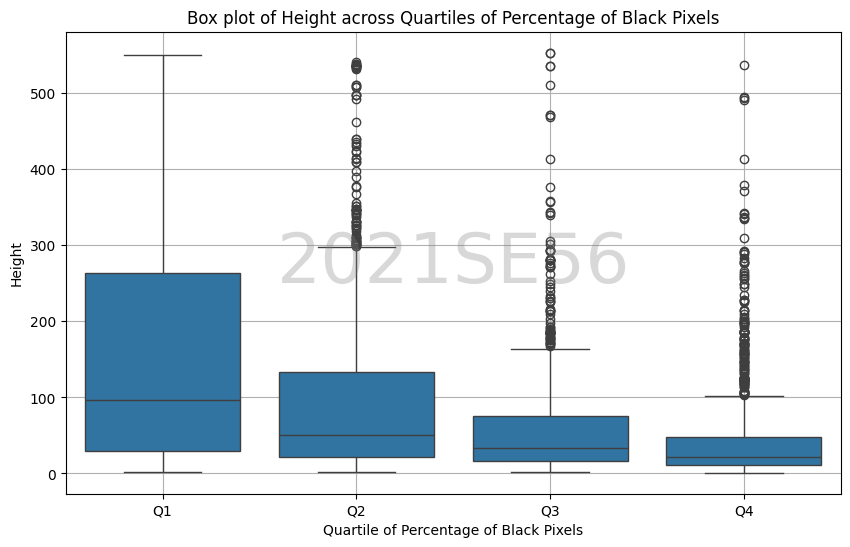

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide 'Percentage of Black Pixels' into quartiles
data['P_BLACK_Quartile'] = pd.qcut(data['p_black'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='P_BLACK_Quartile', y='height', data=data)
plt.title('Box plot of Height across Quartiles of Percentage of Black Pixels')
plt.xlabel('Quartile of Percentage of Black Pixels')
plt.ylabel('Height')
plt.grid(True)
add_watermark(plt.gca(), '2021SE56')
plt.show()

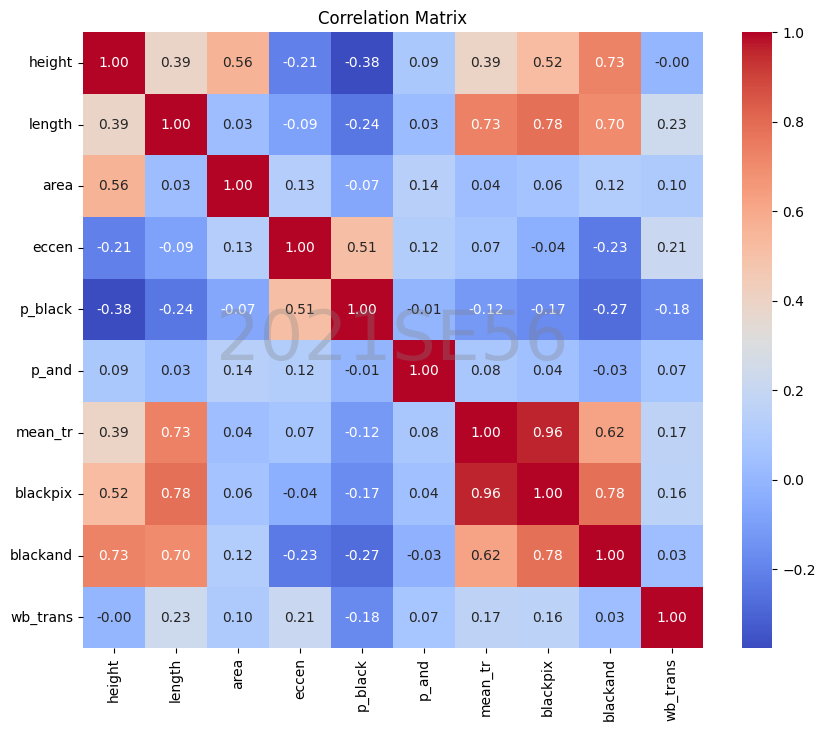

In [26]:
# Correlation matrix
correlation_matrix = data.drop('P_BLACK_Quartile', axis=1).corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
add_watermark(plt.gca(), '2021SE56')
plt.show()


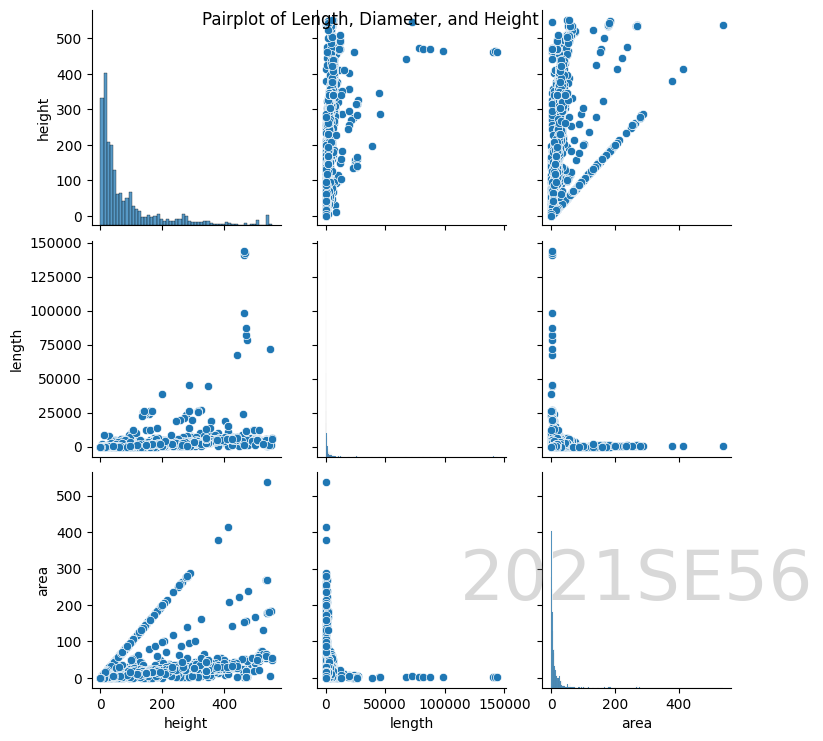

In [27]:
sns.pairplot(data[['height', 'length', 'area']])
plt.suptitle('Pairplot of Length, Diameter, and Height')
add_watermark(plt.gca(), '2021SE56')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'Sex' column using one-hot encoding
PageBlocksData_encoded = pd.get_dummies(data, columns=['Sex'])

# Split the dataset into features (X) and target (y)
X = PageBlocksData_encoded.drop('Rings', axis=1)
y = PageBlocksData_encoded['Rings']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# kNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)


Evaluation Metrics for kNN Classifier:
Confusion Matrix:
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 10  7  6  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7 18 16  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 20 26 18 10  1  1  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  3  4 16 39 24  8  1  3  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  5  8 37 44 24 15  7  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 31 38 27 18  7  5  2  0  2  0  1  0  0  0  0  0]
 [ 0  0  0  0  5 10 26 22 18  6  5  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  2  7 11 13 11  2  4  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  2  2  3  5  6  4  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  2 11  1  2  0  2  1  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  4  2  1  1  5  1  3  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  4  2  3  0  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  

c:\Users\ST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


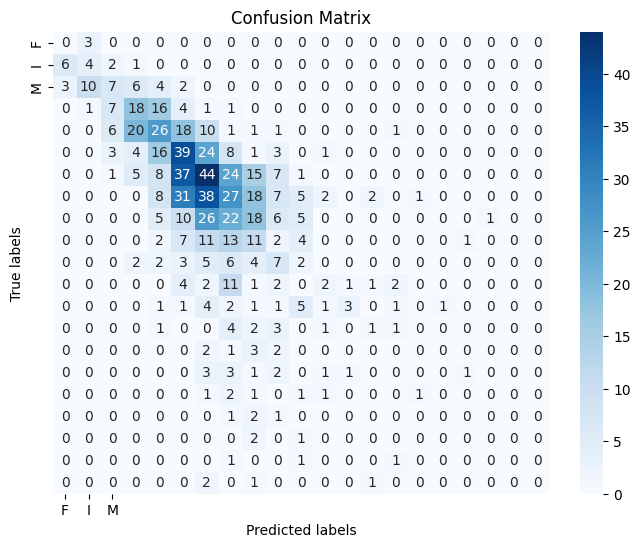


Evaluation Metrics for Naïve Bayes Classifier:
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6 13  9  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 19 12 10  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 14 22 25 13  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  6 21 29 32  3  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  7 19 20 48 19 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 10 21 36 18 44  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  2  1  5  9 19  8 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  5 14  6 18  0  0  0  0  0  0  0  0  1  0  0  1  1  1]
 [ 0  0  0  2  3  3  5  7 10  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  7  8  3  5  0  0  0  0  0  0  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  5  7  7  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0

c:\Users\ST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


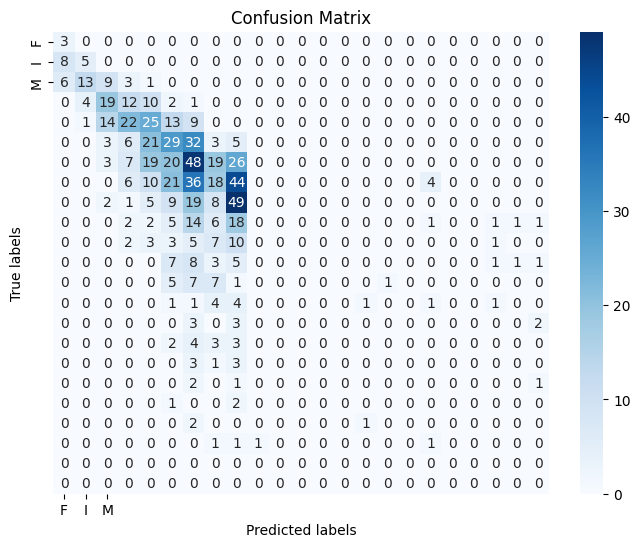

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv(url, names=column_names)

# Encode the 'Sex' column using LabelEncoder
label_encoder = LabelEncoder()
abalone_data['Sex'] = label_encoder.fit_transform(abalone_data['Sex'])

# Split the dataset into features (X) and target (y)
X = abalone_data.drop('Rings', axis=1)
y = abalone_data['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# kNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Evaluation Metrics function
def evaluate_classifier(y_true, y_pred):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    
    # Precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print("Precision:", precision)
    
    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')
    print("Recall:", recall)
    
    # F1-Score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print("F1-Score:", f1)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate kNN Classifier
print("\nEvaluation Metrics for kNN Classifier:")
evaluate_classifier(y_test, knn_predictions)

# Evaluate Naïve Bayes Classifier
print("\nEvaluation Metrics for Naïve Bayes Classifier:")
evaluate_classifier(y_test, nb_predictions)